In [1]:
#conda install -c menpo opencv

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
imgs = [cv.cvtColor(cv.imread(f, cv.IMREAD_COLOR), cv.COLOR_BGR2RGB) 
        for f in ['high_contrast.jpg', 'low_contrast.jfif']]

In [4]:
def show(img):
  plt.figure(figsize=(15, 5), dpi=150)
  plt.imshow(img)

In [5]:
def deform(img, x1, x2, y1, y2):
  return img[x1:x2, y1:y2]

In [22]:
def custom_match_surf(train, query):
  surf = cv.xfeatures2d.SURF_create()
  kp1, des1 = surf.detectAndCompute(cv.cvtColor(train, cv.COLOR_BGR2GRAY), None)
  kp2, des2 = surf.detectAndCompute(cv.cvtColor(query, cv.COLOR_BGR2GRAY), None)

  matches = []
  for i, d1 in enumerate(des1, start=0):
      for j, d2 in enumerate(des2, start=0):
          matches.append(cv.DMatch(_trainIdx=j, _queryIdx=i, _distance=cv.norm(d1, d2, cv.NORM_L1), _imgIdx=0))

  matches = sorted(matches, key=lambda x:x.distance)

  return cv.drawMatches(train, kp1, query, kp2, matches[:10], None, flags=2)


def bf_match_surf(train, query):
  surf = cv.xfeatures2d.SURF_create()
  kp1, des1 = surf.detectAndCompute(cv.cvtColor(train, cv.COLOR_BGR2GRAY), None)
  kp2, des2 = surf.detectAndCompute(cv.cvtColor(query, cv.COLOR_BGR2GRAY), None)
  keypoints_with_size = np.copy(train)
  cv.drawKeypoints(train,kp1,keypoints_with_size)
  fx, plots = plt.subplots(1, 1, figsize=(20,10))
  plots.set_title("Train keypoints With Size")
  plots.imshow(keypoints_with_size, cmap='gray')
  bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
  matches = bf.match(des1,des2)
  matches = sorted(matches, key = lambda x:x.distance)
  return cv.drawMatches(train, kp1, query, kp2, matches[:10], None, flags=2)


for img in imgs:
  show(img)

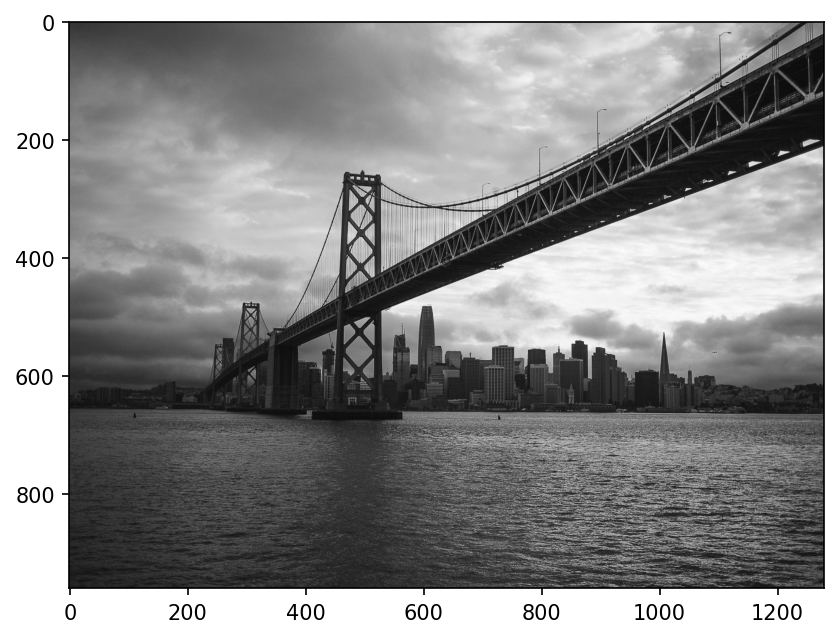

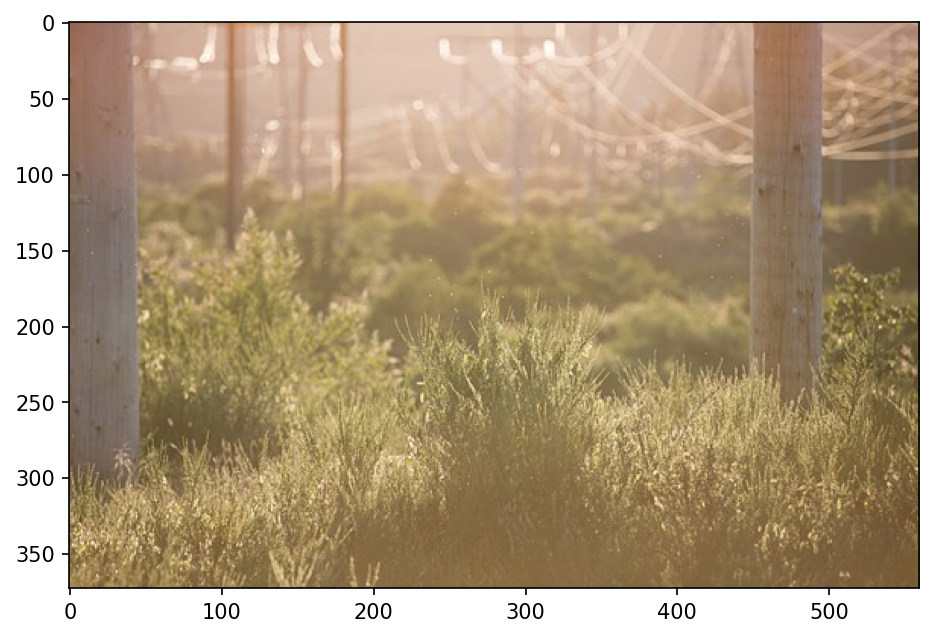

In [8]:
for img in imgs: 
    show(img)

In [9]:
deform_imgs = []
deform_imgs.append(deform(imgs[0], 200, 600, 400, 800))
deform_imgs.append(cv.rotate(imgs[1], cv.ROTATE_90_CLOCKWISE))

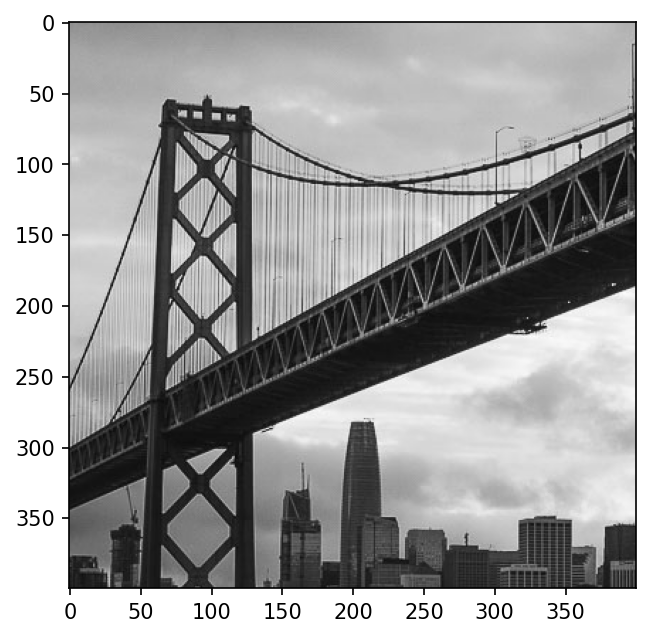

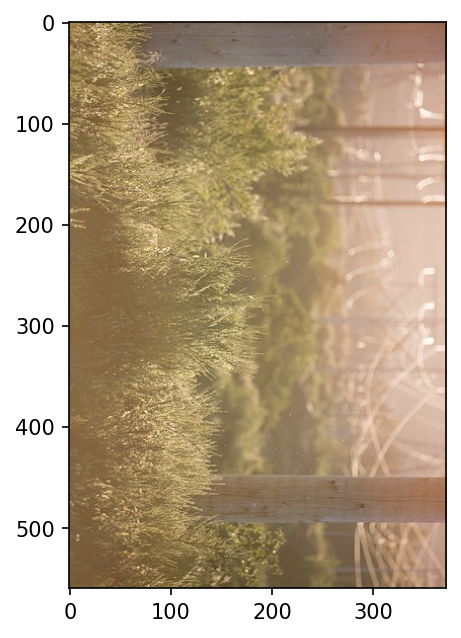

In [10]:
for img in deform_imgs:
  show(img)

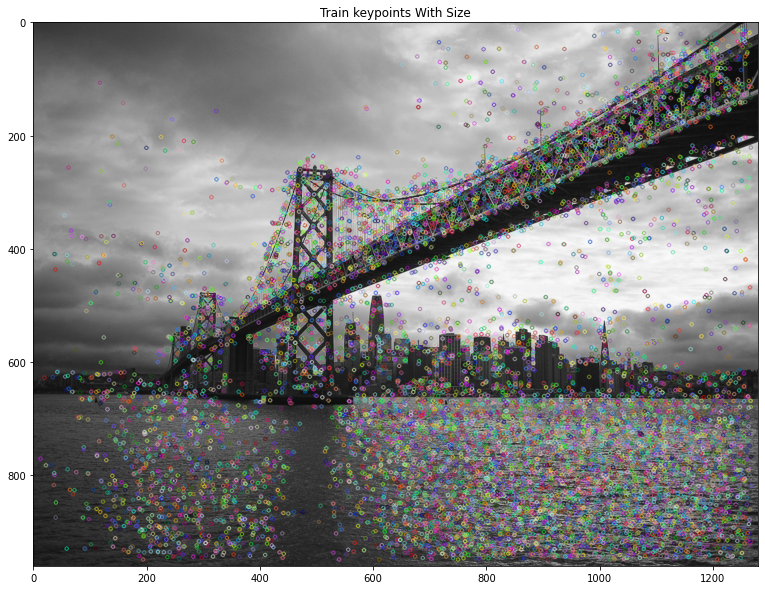

6 19 0.0
0 0 0.0


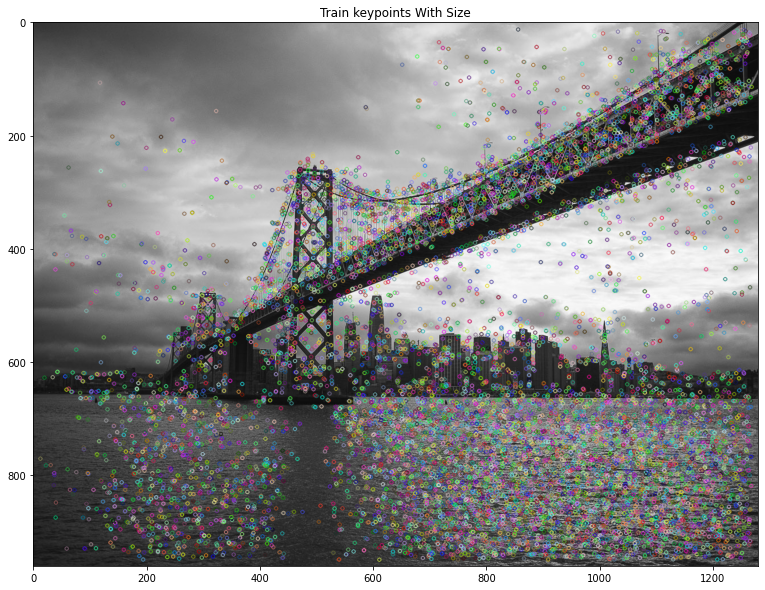

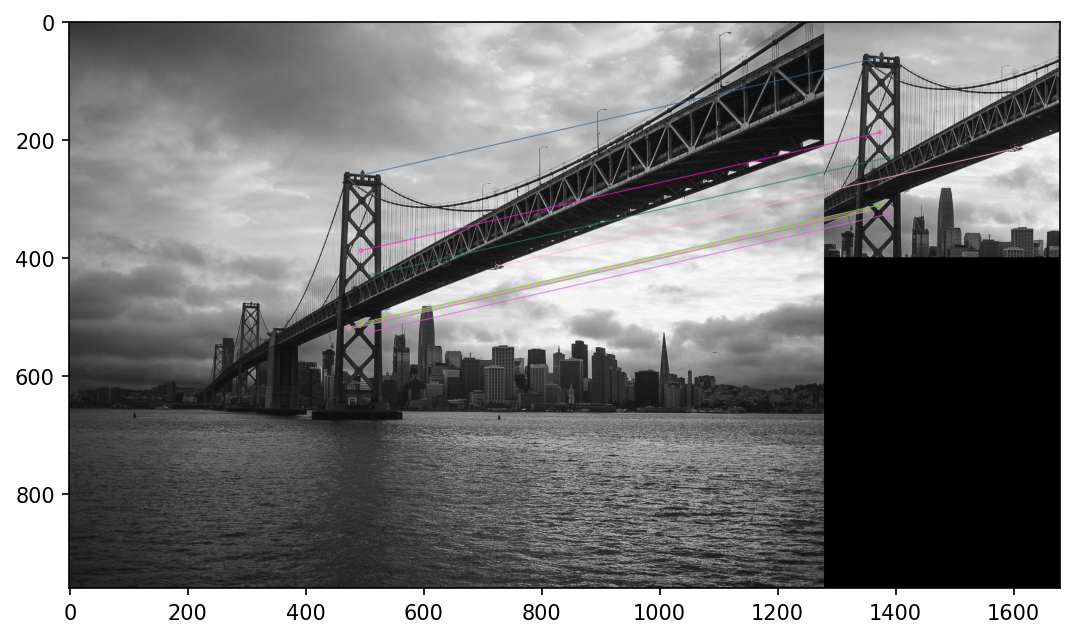

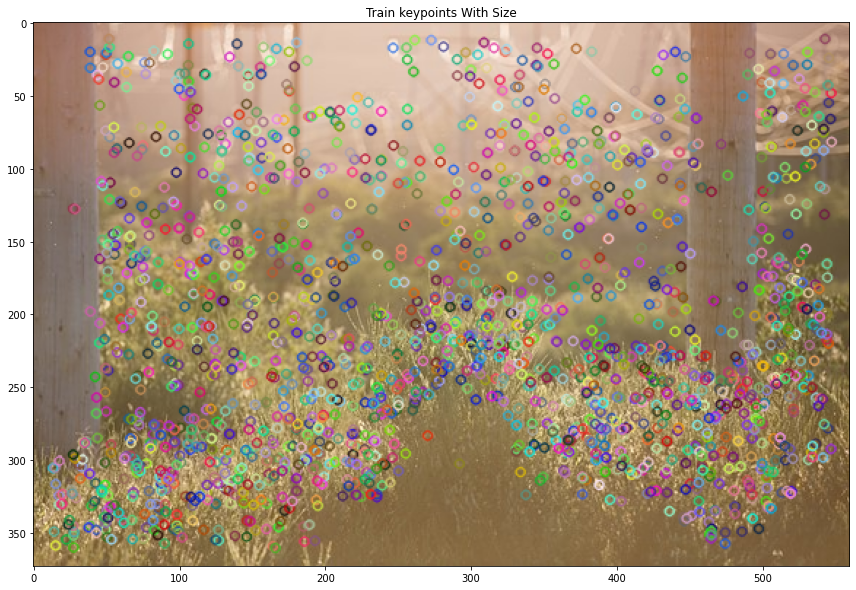

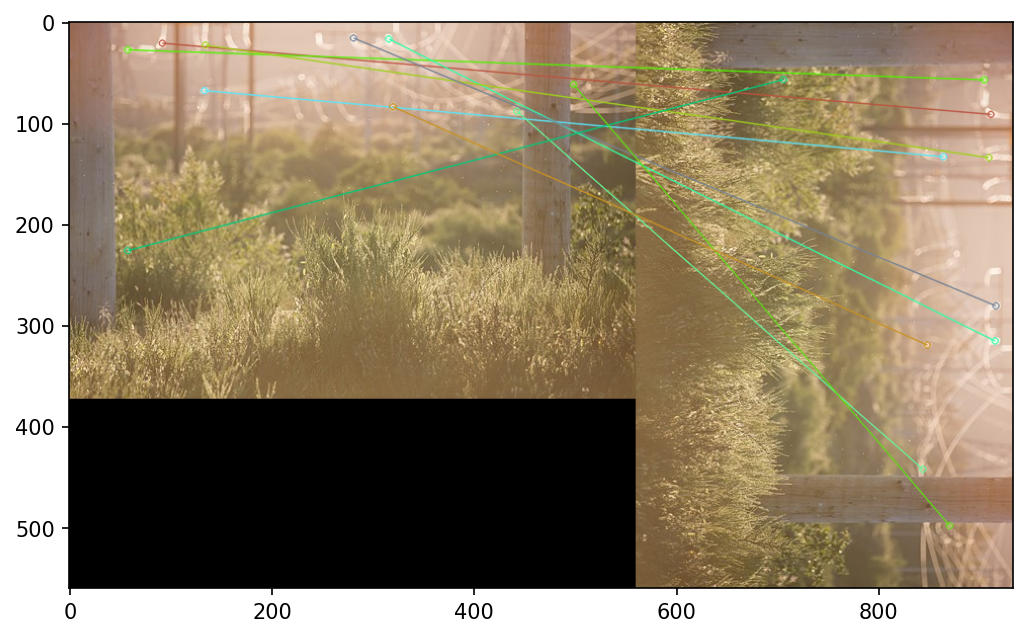

In [20]:
show(bf_match_surf(imgs[0], deform_imgs[0]))
show(bf_match_surf(imgs[1], deform_imgs[1]))

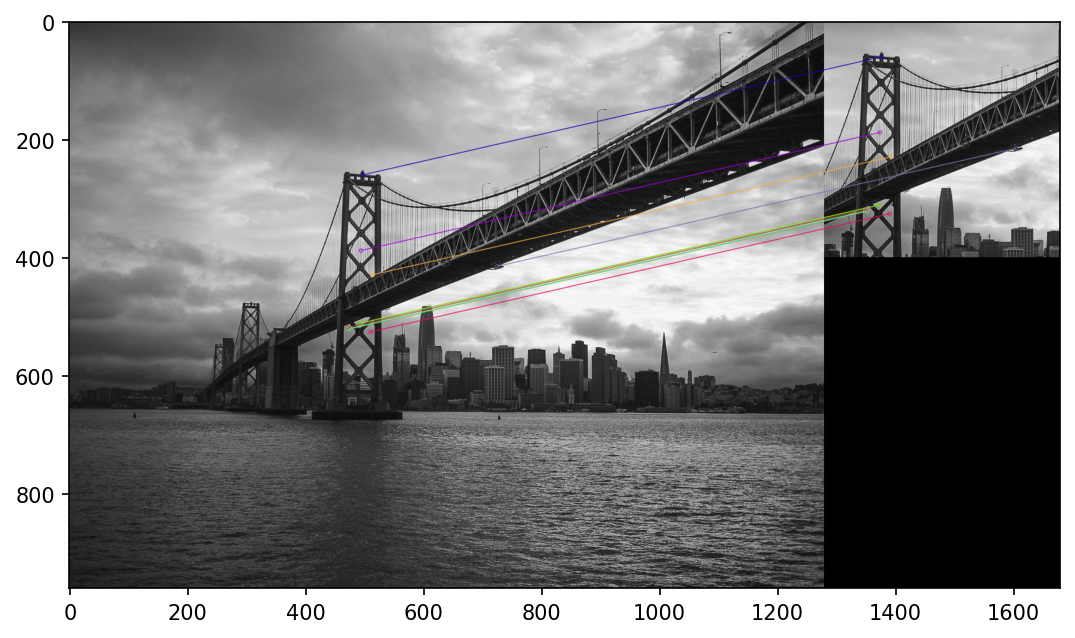

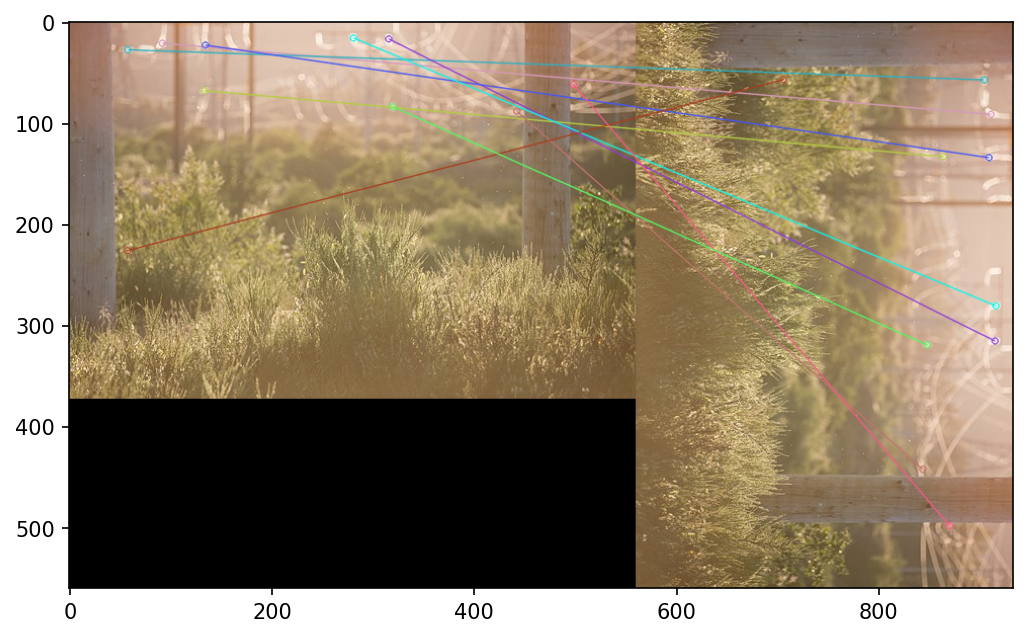

In [23]:
show(custom_match_surf(imgs[0], deform_imgs[0]))
show(custom_match_surf(imgs[1], deform_imgs[1]))